<a href="https://colab.research.google.com/github/charliashby/labs/blob/main/Ashby_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/cta?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page


brands = ['honda', 'dodge','toyota','ford','tesla','gmc','jeep','bmw','mitsubishi','mazda',
          'volvo','audi','volkswagen','chevy','chevrolet','acura','kia','subaru','lexus',
          'cadillac','buick','porsche','infiniti']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [2]:
data = []  # We'll save our listings in this object

for listing in listings:
    # Extract title, price, and link
    title = listing.find('div', class_='title').get_text().lower()
    price = listing.find('div', class_='price').get_text()
    link = listing.find(href=True)['href']

    # Determine brand from the title string
    brand = next((word for word in title.split() if word in brands), 'missing')

    # Determine year from the title string
    match = re.search(r'20[0-9]{2}|19[0-9]{2}', title)
    year = match.group(0) if match else np.nan

    # Append the extracted data to the list
    data.append({
        'title': title,
        'price': price,
        'year': year,
        'link': link,
        'brand': brand
    })

In [3]:
# Assuming 'data' is the list of dictionaries created from the previous BeautifulSoup parsing code
df = pd.DataFrame.from_dict(data)

# Clean the 'price' column by removing '$' and ',' and converting it to numeric
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Convert the 'year' column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Calculate the 'age' of the items based on the year
df['age'] = 2025 - df['year']

# Print the shape of the DataFrame
print(df.shape)

# Export the cleaned DataFrame to a CSV file
df.to_csv('craigslist_cville_cars.csv', index=False)

# Display the first few rows of the DataFrame
df.head()

(90, 6)


,title,price,year,link,brand,age
0,2017 nissan sentra sr turbo cvt,14000,2017.0,https://charlottesville.craigslist.org/cto/d/c...,missing,8.0
1,1997 bmw 328i convertible,4600,1997.0,https://charlottesville.craigslist.org/cto/d/c...,bmw,28.0
2,1974 dodge stepside 426 hemi,10500,1974.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,51.0
3,"2013 lexus rx350 only 61,500 miles",18900,2013.0,https://charlottesville.craigslist.org/cto/d/m...,lexus,12.0
4,sequoia 2005,2000,2005.0,https://charlottesville.craigslist.org/cto/d/c...,missing,20.0


count       90.000000
mean      8228.588889
std       7998.559398
min         10.000000
25%       3000.000000
50%       5900.000000
75%      10975.000000
max      49900.000000
Name: price, dtype: float64


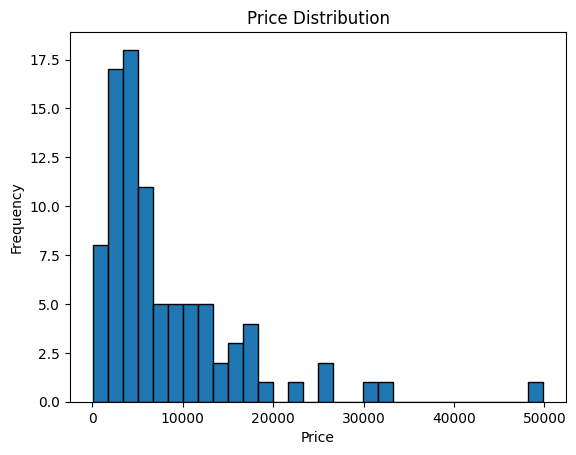

count    74.000000
mean     18.959459
std      10.918677
min       4.000000
25%      12.000000
50%      18.000000
75%      21.000000
max      63.000000
Name: age, dtype: float64


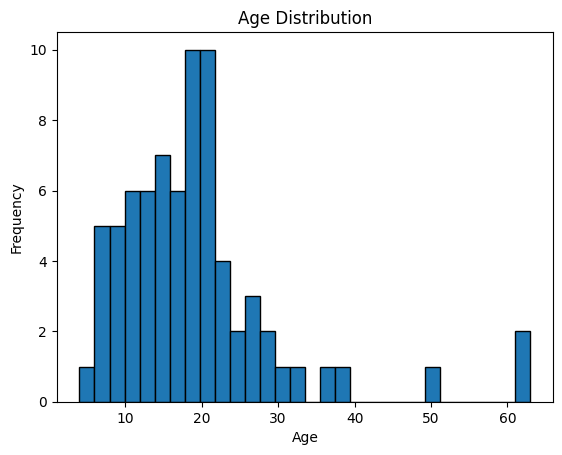

In [4]:
# Descriptive statistics for the 'price' column
print(df['price'].describe())

# Histogram for the 'price' column
df['price'].hist(grid=False, bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for the 'age' column
print(df['age'].describe())

# Histogram for the 'age' column
df['age'].hist(grid=False, bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                          \
           count          mean           std      min       25%      50%   
brand                                                                      
acura        1.0   3500.000000           NaN   3500.0   3500.00   3500.0   
audi         2.0   6432.500000   7399.872465   1200.0   3816.25   6432.5   
bmw          5.0   5600.000000   2026.079959   3000.0   4600.00   5900.0   
buick        3.0   3700.000000    984.885780   2600.0   3300.00   4000.0   
chevrolet    3.0  10000.000000   6500.000000   6000.0   6250.00   6500.0   
chevy        4.0   4002.500000   3261.905118     10.0   3002.50   4000.0   
dodge        5.0   6900.000000   3471.310992   2000.0   6000.00   6000.0   
ford         7.0   6278.571429   4321.829970   1000.0   2500.00   7250.0   
gmc          3.0   8300.000000   5980.802622   3500.0   4950.00   6400.0   
honda       10.0   7144.900000   3926.982739   1000.0   4725.00   7200.0   
jeep         4.0   8725.000000   7818.940678   1500.0   2625.00   7750.0   
kia          1.0   9500.000000           NaN   9500.0   9500.00   9500.0   
lexus        2.0  16925.000000   2793.071786  14950.0  15937.50  16925.0   
missing     23.0   8997.782609   8545.941057   1200.0   2900.00   4950.0   
mitsubishi   1.0   2500.000000           NaN   2500.0   2500.00   2500.0   
subaru       3.0   4300.000000   2787.471973   2000.0   2750.00   3500.0   
tesla        2.0  21450.000000   6434.671709  16900.0  19175.00  21450.0   
toyota       9.0  12650.000000  16599.359927   1500.0   3300.00   4100.0   
volkswagen   1.0   4950.000000           NaN   4950.0   4950.00   4950.0   
volvo        1.0   2000.000000           NaN   2000.0   2000.00   2000.0   

                               
                 75%      max  
brand                          
acura        3500.00   3500.0  
audi         9048.75  11665.0  
bmw          6000.00   8500.0  
buick        4250.00   4500.0  
chevrolet   12000.00  17500.0  
chevy        5000.00   8000.0  
dodge       10000.00  10500.0  
ford         9600.00  11500.0  
gmc         10700.00  15000.0  
honda        9637.50  13000.0  
jeep        13850.00  17900.0  
kia          9500.00   9500.0  
lexus       17912.50  18900.0  
missing     14500.00  31950.0  
mitsubishi   2500.00   2500.0  
subaru       5450.00   7400.0  
tesla       23725.00  26000.0  
toyota      11000.00  49900.0  
volkswagen   4950.00   4950.0  
volvo        2000.00   2000.0

In [6]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
acura        1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
audi         1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0
bmw          3.0  17.666667   9.073772  11.0  12.50  14.0  21.00  28.0
buick        1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
chevrolet    3.0  27.333333   9.609024  17.0  23.00  29.0  32.50  36.0
chevy        3.0  26.333333   4.163332  23.0  24.00  25.0  28.00  31.0
dodge        2.0  36.000000  21.213203  21.0  28.50  36.0  43.50  51.0
ford         6.0  21.833333   9.152413  13.0  17.25  19.0  23.00  39.0
gmc          3.0  16.000000   9.539392  10.0  10.50  11.0  19.00  27.0
honda       10.0  17.000000   7.180220  10.0  11.25  15.5  20.50  33.0
jeep         3.0  37.333333  22.368132  22.0  24.50  27.0  45.00  63.0
kia          1.0   9.000000        NaN   9.0   9.00   9.0   9.00   9.0
lexus        2.0  13.500000   2.121320  12.0  12.75  13.5  14.25  15.0
missing     19.0  17.210526  11.905083   6.0  11.50  16.0  19.50  62.0
mitsubishi   1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
subaru       3.0  16.000000   2.645751  13.0  15.00  17.0  17.50  18.0
tesla        2.0   8.000000   1.414214   7.0   7.50   8.0   8.50   9.0
toyota       8.0  14.625000   8.314145   4.0   7.00  15.0  20.50  27.0
volkswagen   1.0  15.000000        NaN  15.0  15.00  15.0  15.00  15.0
volvo        1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0

In [7]:
df.loc[ df['brand']=='audi',:]
#filters the df to return only the rows where the value in brand column is "audi"

,title,price,year,link,brand,age
32,2004 audi a6 2.7t s-line quatro sedan 4d,1200,2004.0,https://charlottesville.craigslist.org/cto/d/s...,audi,21.0
85,audi allroad,11665,NaN,https://charlottesville.craigslist.org/cto/d/c...,audi,NaN


<Axes: xlabel='age', ylabel='price'>

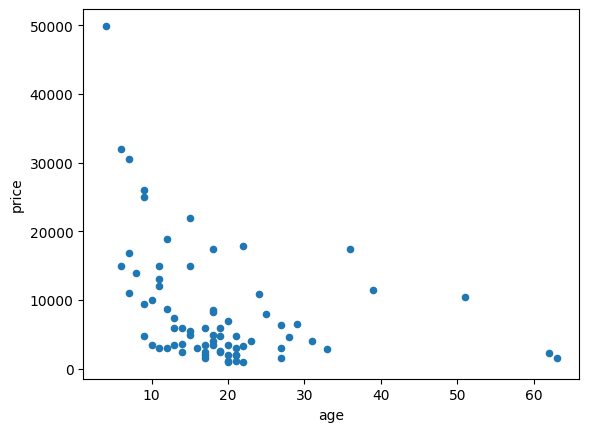

In [8]:
df.plot.scatter('age','price')

In [ ]:
#This code created by ChatGPT